# Tarea 2 - Introducción a la Biomecánica
### Pregunta 2

In [111]:
# Importación de librerías

import numpy as np
import matplotlib.pyplot as plt

In [112]:
# Definición de parámetros

global L
global h
global R
global mu
global lambda_

L = 10
h = 1
R = 10
mu = 1
lambda_ = 10

In [113]:
# Creación de la matriz

B_x = np.linspace(0, L, 250)
B_y = np.linspace(-h / 2, h / 2, 25)

BB_x, BB_y = np.meshgrid(B_x, B_y)

[]

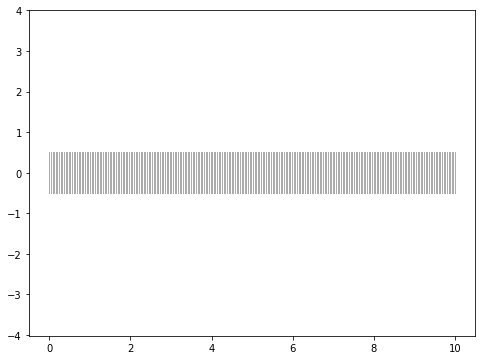

In [114]:
# Ploteo sin deformación

fig = plt.figure(figsize=(8,6))
plt.fill(BB_x, BB_y, color='#ABABAB')
plt.axis('equal')
plt.plot()

In [115]:
# Función de deformación

def phi(x, y):
    xx = (y + R) * np.sin(np.pi * x / L)
    yy = (y - (y + R) * (1 - np.cos(np.pi * x / L)))

    return xx, yy

In [116]:
# Creación de malla deformada

BB_XX, BB_YY = phi(BB_x,BB_y)

[]

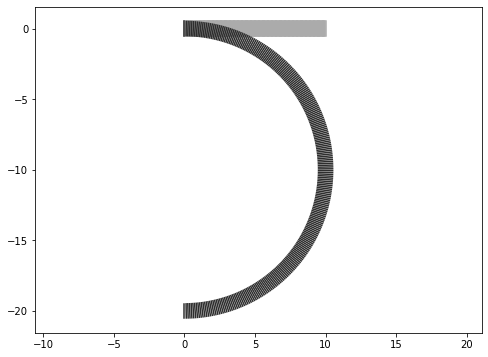

In [117]:
# Ploteo con deformación

fig = plt.figure(figsize=(8,6))
plt.plot(BB_x, BB_y, color='#ABABAB')
plt.plot(BB_XX, BB_YY, color='#2E2E2E')
plt.axis('equal')
plt.plot()

In [118]:
# Definición de tensor gradiente de deformación

F = np.zeros((*BB_x.shape, 2, 2))
F.shape

(25, 250, 2, 2)

In [119]:
P = np.zeros((*BB_x.shape, 2, 2))
P.shape

(25, 250, 2, 2)

In [120]:
# Cálculo de tensores de deformación

for i in range(len(BB_XX[:, 0])):
    for j in range(len(BB_YY[0, :])):
        local_x = BB_XX[i, j]
        local_y = BB_YY[i, j]
        local_F = np.array([
            [np.pi / L * (local_y + R) * np.cos(np.pi * local_x / L), np.sin(np.pi * local_x / L)],
            [-np.pi / L * (local_y + R) * np.sin(np.pi * local_x / L), np.cos(np.pi * local_x / L)]
        ])
        
        F[i, j] = local_F

        # Determinante de F
        J = np.pi / L * (local_y + R)
        log_J = np.log(J)
        
        local_P = mu * (local_F - np.linalg.inv(np.transpose(local_F))) + lambda_ * log_J * np.linalg.inv(np.transpose(local_F))

        P[i, j] = local_P

C:\Users\ivanv\AppData\Local\Temp/ipykernel_19940/1753861101.py:16: RuntimeWarning: invalid value encountered in log
  log_J = np.log(J)


In [166]:
P_11 = P[:, :, 0, 0]
P_12 = P[:, :, 0, 1]
P_21 = P[:, :, 1, 0]
P_22 = P[:, :, 1, 1]

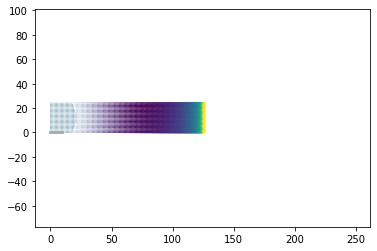

In [170]:
plt.figure()
plt.plot(BB_x, BB_y, color='#ABABAB')
plt.quiver(BB_x, BB_y, P_22, color = 'k')  # * es para desempaquetar
plt.axis('equal')
#plt.xlim(0.75 * L, 1.25 * L)
#plt.ylim(-0.25 * h, 0.25 * h)
plt.show()

#### Hecho con :heart: por Iván Vergara Lam